# Assignment 2: Support Vector Machines

In this assignment you will:
* Implement a SVM using the SMO algorithm
* Do multi-class handwritten digit classification with off-the-shelf SVM solvers (with kernel functions)
* Tune model hyper-parameters to achieve good generalisation

# Part 1: Implement the SMO algorithm

I strongly recommend reading the original paper where the SMO algorithm was first introduced. Follow the following link to get the PDF version https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf


## Setup

First import the required packages and do some setup:

In [71]:
from __future__ import print_function

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from assignment2 import *
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler


# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generate toy 2D datasets. The labels are set to **-1 and 1**.

In [72]:
# Load the dataset
X_train, y = make_circles(n_samples=300,factor=.1, noise=.05)


# Change 0 labels to -1 for SVM
y[y == 0] = -1

X_train_blobs, y_blobs = make_blobs(n_samples=300, centers=2,
                        n_features=2, random_state=1,cluster_std=1.0,center_box=(-5,5))

X_train_blobs = X_train_blobs

# Change 0 labels to -1 for SVM
y_blobs[y_blobs == 0] = -1


Lets have a look at our data.

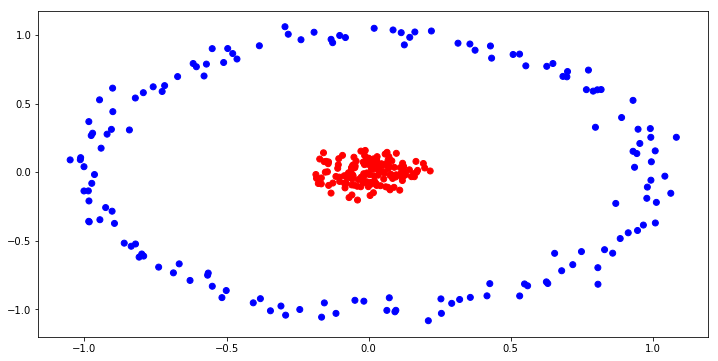

In [73]:
plt.scatter(X_train[:,0], X_train[:,1], marker='o',c=['r' if y[i]==1 else 'b' for i in range(y.shape[0])])

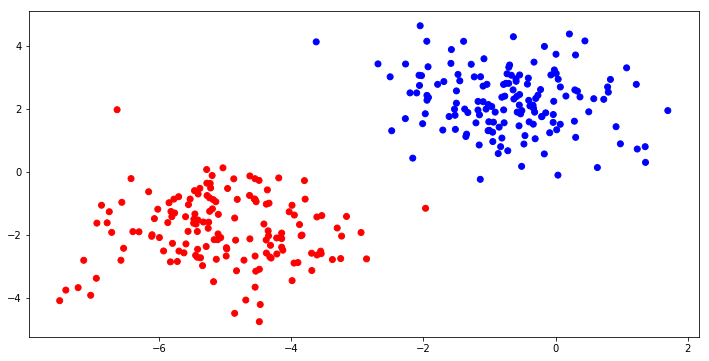

In [74]:
plt.scatter(X_train_blobs[:,0], X_train_blobs[:,1], marker='o',c=['r' if y_blobs[i]==1 else 'b' for i in range(y_blobs.shape[0])])

## Exercise 1: The SVM Kernels [10 Points]

**TODO**:  Implement two kernels that we will use in this assignment. Complete the code for the Linear and Gaussian kernel functions in **svm_smo.py** according to the specifications.

In [75]:
# Test your implementation
a = np.ones([1, 10])
print(linear(a, a, b=1))
print(gaussian(a, a))

11.0
1.0


## Exercise 2: The SVM Cost [10 Points]

Recall the formulation of the optimization problem solved by the SMO algorithm:

\begin{array} { c } { \max _ { \alpha } \quad W ( \alpha ) = \sum _ { i = 1 } ^ { m } \alpha _ { i } - \frac { 1 } { 2 } \sum _ { i , j = 1 } ^ { m } y ^ { ( i ) } y ^ { ( j ) } \alpha _ { i } \alpha _ { j } \left\langle x ^ { ( i ) } , x ^ { ( j ) } \right\rangle } \\ { \text { s.t. } \quad 0 \leq \alpha _ { i } \leq C , i = 1 , \ldots , m } \\ { \sum _ { i = 1 } ^ { m } \alpha _ { i } y ^ { ( i ) } = 0 } \end{array}


**TODO**: Implement the objective function in **svm_smo.py** according to specs.

In [76]:
# Test your implementation
print(objective_function(np.ones([1, 10]), np.ones([1, 10]), linear,np.ones([10, 10])))
print(objective_function(np.ones([1, 10]), np.ones([1, 10]), gaussian, np.ones([10, 10])))

-540.0
-40.0


## Exercise 3: The SVM Decision Function [10 Points]

Recall the decision function:

\begin{aligned} w ^ { T } x + b & = \left( \sum _ { i = 1 } ^ { m } \alpha _ { i } y ^ { ( i ) } x ^ { ( i ) } \right) ^ { T } x + b \\ & = \sum _ { i = 1 } ^ { m } \alpha _ { i } y ^ { ( i ) } \left\langle x ^ { ( i ) } , x \right\rangle + b \end{aligned}

**TODO**: Implement the decision function in **svm_smo.py** according to specs. 

In [77]:
# Test your implementation
print(decision_function(np.ones([1, 10]), np.ones([1, 10]), gaussian, np.ones([10, 5]), np.ones([1, 5]), 0))

10.0


## Exercise 4: Alpha Update Rule [10 Points]

Recall the rule to update alpha:


<img src="alpha.png" height=500 width=500>


**TODO**: Implement the alpha update in the **take_step** function in **svm_smo.py** according to specs.

## Exercise 5: Test Your Implementation [10 Points]

In this exercise you need to test your implementation on two toy datasets. The first dataset is linearly separable and you should use a SVM with linear kernel. In the second case the data is not linearly separable and you should use a SVM with Gaussian kernel. In both cases you should vary the value of C and explain the influence of C on the decision boundary.

### Linear Kernel SVM

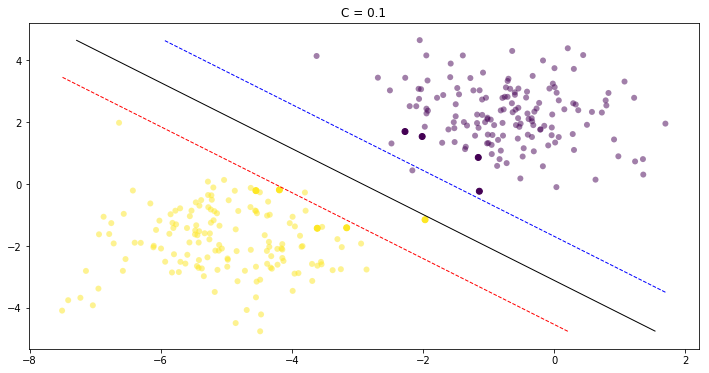

In [78]:
# Set model parameters and initial values
C = 0.1
m = len(X_train_blobs)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_train_blobs, y_blobs, C, linear,initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel, model.X, model.X, model.b) - model.y
model.errors = initial_error

# Train the model
np.random.seed(0)
output = train(model)

# Plot results
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)
plt.title('C = ' + str(C))
plt.show()

### Gaussian Kernel SVM

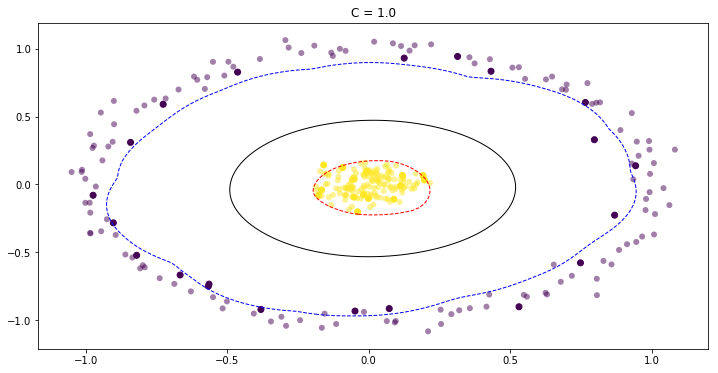

In [79]:
# Set model parameters and initial values
C = 1.
m = len(X_train)
initial_alphas = np.zeros(m)
initial_b = 0.0

# Instantiate model
model = SMOModel(X_train, y, C, gaussian,initial_alphas, initial_b, np.zeros(m))

# Initialize error cache
initial_error = decision_function(model.alphas, model.y, model.kernel,model.X, model.X, model.b) - model.y
model.errors = initial_error

# Train the model
np.random.seed(0)
output = train(model)

# Plot results
fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(output, ax)
plt.title('C = ' + str(C))
plt.show()

## Question:
* How does C influence the classifier? What were the best values in the two cases?

***Your Answer:*** C is a mesurement of how big the tolerance of missclassifications is, the lower C gets the more missclassifications are allowed in the training set. There is a tradeoff between performace and accuracy, so the 0.1 that is preset seems quite reasonable. With the Gaussian Kernel it seems like values lower than around 0.6 are unusable but there is not a huge difference when i increase C drastically. Therefor i would say that the given 1 is quite good.

# Part 2: Multi-Class SVM

In this second part of the assignment you will train a multi-class SVM on a dataset of handwritten digits.

A seperate (withheld) test set will be used for the evaluation of your classifiers. It is therefore important that you take good care not to overfit and ensure that your models generalize to unseen data.


## Setup

First load and visualize some of the data:


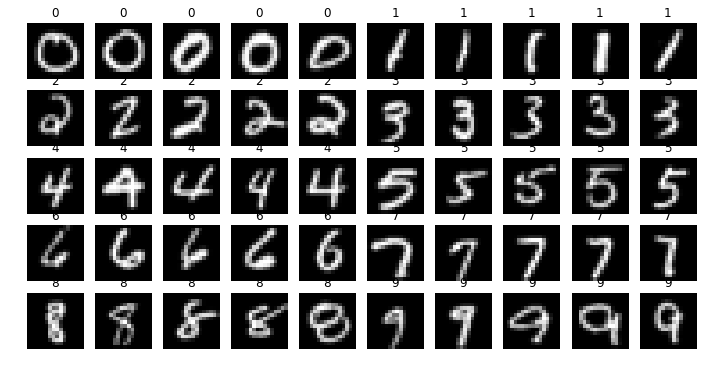

In [80]:
import numpy as np
import matplotlib.pyplot as plt

classes = range(10)

data = np.load('data.npy')
X = data[()]['X']
y = data[()]['y']

# Visualize some examples from the dataset.
samples_per_class = 5
imgs = np.reshape(X, [-1, 16, 16])
labels = y

for j, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = j * samples_per_class + i + 1
        plt.subplot(samples_per_class, len(classes), plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

## Exercise 6: Preparing the data [5 Points]

In this exercise you should:
* Prepare the data for cross validation (train/test splits)
* Preprocess the data for use with the SVM (this can have a **big** effect on the performance!)

**NOTE:** You are allowed to use any functions in sklearn for this exercise

In [81]:
from sklearn import preprocessing

X_train = y_train = X_test = y_test = None

#######################################################################
# TODO:                                                               #
# Arrange the data into train and test sets                           #
# Be careful about how you split the data:                            #
# - If train and test distribution are very different your test       #
#   performance will be poor                                          #
# - Think about the sizes of the splits: What are good values and how #
#   does this affect your train/test performance?                     #
#######################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################


def pre_process(x):
    #######################################################################
    # TODO:                                                               #
    # Implement preprocessing of the data before feeding to the SVM.      #
    # NOTE: This function will be used to grade the performance on the    #
    # held-out test set                                                   #
    #######################################################################
    
    x = preprocessing.scale(x)
    
    #######################################################################
    #                         END OF YOUR CODE                            #
    #######################################################################
    return x

X_train = pre_process(X_train)
X_test = pre_process(X_test)

data = np.load('data_test.npy')
X_test = pre_process(data[()]['X_test'])
y_test = data[()]['y_test']

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (24500, 256)
Training labels shape:  (24500,)
Test data shape:  (35000, 256)
Test labels shape:  (35000,)


# Exercise 7: Training and evaluating a linear SMV [10 Points]

Now its time to train a linear SVM on your training data and evaluate its performance on the test set.

You should use [sklearn.svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) for training the model. See the documentation for usage, arguments, return values and methods.

Solving linear-SVM...


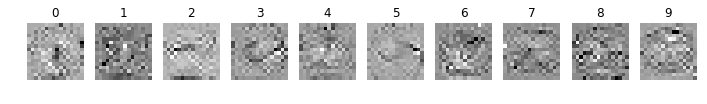

In [82]:
from sklearn.svm import LinearSVC

def train_linear_SVM(X, y, C, max_iter=100):
    """
    Linear multi-class SVM solver.

    Args:
        X: Data matrix of shape [num_train, num_features]
        y: Labels corresponding to X of size [num_train]
        C: Hyper-parameter for SVM
        max_iter: Maximum number of iterations

    Returns:
        lin_clf: The learnt classifier (LinearSVC instance)

    """
    lin_clf = None
    print('Solving linear-SVM...')

    #######################################################################
    # TODO:                                                               #
    # Train the SVM using LinearSVC and return the learnt classifier      #
    #######################################################################

    lin_clf = LinearSVC(random_state=0, C=0.1, max_iter=100)
    lin_clf.fit(X, y)

    #######################################################################
    #                         END OF YOUR CODE                            #
    #######################################################################
    return lin_clf

C = 5.0
lin_clf = train_linear_SVM(X_train, y_train, C)

#######################################################################
# TODO:                                                               #
# Visualize the learnt weights (lin_clf.coef_) for all the classes:   #
# - Make a plot with ten figures showing the respective weights for   #
#   each of the classes                                               #
#######################################################################

for i in classes:
    plt.subplot(1, len(classes), i + 1)
    plt.imshow(np.reshape(lin_clf.coef_[i], [16,16]))
    plt.axis('off')
    plt.title(i)
plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################


## Exercise 8: Evaluating a multi-class classifier [10 Points]

You should now evaluate you learnt classifier. For this you have to:
* Compute predictions on the train and test sets
* Compute the accuracy of the predictions
* Compute the confusion matrix (see [here](https://en.wikipedia.org/wiki/Confusion_matrix) for info)
* Answer the question below

**Note:** You can make use of sklearn.metrics


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix

def eval_clf(y_pred_train, y_pred_test):
    acc_test = acc_train = cm_test = None
    #######################################################################
    # TODO:                                                               #
    # Use the learnt classifier to make predictions on the test set.      #
    # Compute the accuracy on train and test sets.                        #
    # Compute the confusion matrix on the test set.                       #
    #######################################################################

    _test = train_linear_SVM(X_test, y_test, C = 1.0)
    preds_test = _test.predict(X_test)
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, preds_test)
    
    cm_test = confusion_matrix(y_test, preds_test)

    #######################################################################
    #                         END OF YOUR CODE                            #
    #######################################################################
    return acc_train, acc_test, cm_test

acc_train, acc_test, cm_test = eval_clf(lin_clf.predict(X_train), lin_clf.predict(X_test))
print("Linear SVM accuracy train: {}".format(acc_train))
print("Linear SVM accuracy test: {}".format(acc_test))
print("Confusion matrix:\n%s" % cm_test)

Solving linear-SVM...
Linear SVM accuracy train: 0.924204081633
Linear SVM accuracy test: 0.922057142857
Confusion matrix:
[[3358    1    8    6    5   12   20    1   15    0]
 [   0 3918   17   10    1    9    5    4   34    4]
 [  25   28 3097   50   39   23   41   40   95   18]
 [  12   14   76 3124    9  114   12   31   74   39]
 [   3   14   22    7 3215    8   16   10   29  129]
 [  29   12   13  102   46 2800   61   15   70   41]
 [  15   10   35    1   16   42 3276    2   16    0]
 [  13   17   40   14   41    8    2 3469    6   97]
 [  24   82   29   82   26  103   27   20 2977   62]
 [  19   19   12   63  102   25    1  106   32 3038]]


## Question: 
* Which pair of digits does the classifier confuse most often?

***Your Answer:*** I did run it multiple times. It seems like digits 4 and 9 are confused most often

## Exercise 9: Training and evaluating a SMV with Gaussian kernel [10 Points]

Now you will train a SVM with Gaussian kernel (also called RBF kernel).

You should use [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for training the model. See the documentation for usage, arguments and return values.
Experiment with values for the hyper-parameters $C$ and $\gamma$ and answer the question below.
Repeat the same experiment with sigmoid, linear and polynomial kernels.

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def train_gaussian_SVM(X, y, C, gamma, max_iter=100):
    """
    Multi-class SVM solver with Gaussian kernel.

    Args:
        X: Data matrix of shape [num_train, num_features]
        y: Labels corresponding to X of size [num_train]
        C: Hyper-parameter for SVM
        max_iter: Maximum number of iterations

    Returns:
        w: The value of the parameters after logistic regression

    """
    clf_rbf = None
    print('Solving RBF-SVM: This can take a while...')
    
    #######################################################################
    # TODO:                                                               #
    # Train the SVM using LinearSVC and return the learnt classifier      #
    #######################################################################

    clf_rbf = SVC(random_state=0, C=C, max_iter=max_iter, kernel='rbf', gamma=gamma)
    clf_rbf.fit(X, y)

    #######################################################################
    #                         END OF YOUR CODE                            #
    #######################################################################
    return clf_rbf

C = 1.5
gamma = 0.01
clf_rbf = train_gaussian_SVM(X_train, y_train, C, gamma)

acc_train, acc_test, cm_test = eval_clf(clf_rbf.predict(X_train), clf_rbf.predict(X_test))
print("RBF SVM accuracy train: {}".format(acc_train))
print("RBF SVM accuracy test: {}".format(acc_test))
print("Confusion matrix:\n%s" % cm_test)

Solving RBF-SVM: This can take a while...
Solving linear-SVM...
RBF SVM accuracy train: 0.972530612245
RBF SVM accuracy test: 0.922057142857
Confusion matrix:
[[3358    1    8    6    5   12   20    1   15    0]
 [   0 3918   17   10    1    9    5    4   34    4]
 [  25   28 3097   50   39   23   41   40   95   18]
 [  12   14   76 3124    9  114   12   31   74   39]
 [   3   14   22    7 3215    8   16   10   29  129]
 [  29   12   13  102   46 2800   61   15   70   41]
 [  15   10   35    1   16   42 3276    2   16    0]
 [  13   17   40   14   41    8    2 3469    6   97]
 [  24   82   29   82   26  103   27   20 2977   62]
 [  19   19   12   63  102   25    1  106   32 3038]]


## Question:
* How do the hyper-parameters influence the classifier? What happens for extreme values of the hyper-parameters?

***Your Answer:*** gamma: has influence on how far the influence of a single sample goes - high values indicate very local effects and vice versa. a low valued gamma indicates high variance and low bias which might lead to overfitting.  
C is about how much missclassification is allowed. low C leads to a smooth hyperplane while high C leads to pretty much 100% accuracy in the training set (the way this is done might again lead to overfitting) 


# Visualizing SVM Boundaries [10 Points]
In this exercise you need to test different SVMs on the IRIS dataset and visualize the decision boundaries learnt by the SVM for each type of the kernel. Additionally analize the influence of the hyper-parameter $\gamma$.

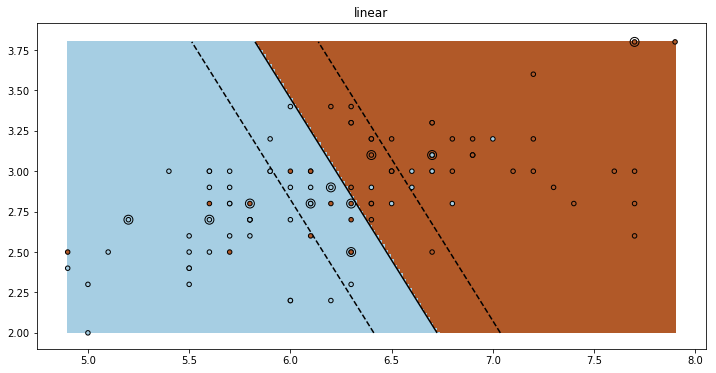

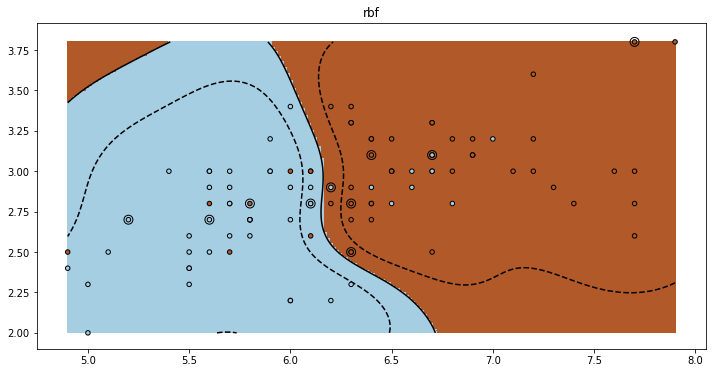

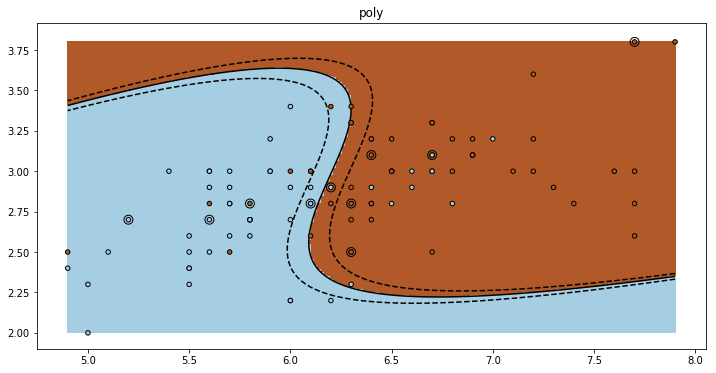

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    
    #######################################################################
    # TODO:                                                               #
    # Train an SVM with the given kernel                                  #
    #######################################################################
    
    clf = svm.SVC(kernel=kernel, gamma=5.0)
    clf.fit(X, y)
    
    #######################################################################
    #                         END OF YOUR CODE                            #
    #######################################################################
    
    
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Plot the results
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

## Exercise 10: Questions [10 Points]

Answer the following questions and justify your answers: 

* Linear SVM vs. Gaussian Kernel SVM: Give advantages and disadvantages of both approaches. 

	***Your Answer:*** Linear SVM: quickly trained, overfitting not a big issue but less accurate than a well setup Gaussian Kernel SVM.

    Gaussian Kernel SVM: Extreamly accurate when well tuned, requires more trainingdata than linear SVM.
    
* Linear SVM vs. Gaussian Kernel SVM: In what setting would you pick one method over the other? Answer in terms of number of training examples $m_{train}$ and feature dimension $d$

	***Your Answer:*** When the number of training examples  $m_{train}$  is smaller than the feature dimension  $d$ , then its a good idea to use a linear SVM since there is no need for an even higher dimensional space. If the number of training examples  $m_{train}$ however is larger than the number of features, its smart to use a gaussian kernel SVM. If the number of training examples  $m_{train}$  is very large (on my machine around 50'000) speed might be an issue with gaussian so you might want to use a linear SVM

## Bonus: Tune those Hyper-Parameters! [15 Points]

Perform hyper-parameter tuning for the two multi-class SVMs. Your performance will be measured on a held-out test set and the **10% best scoring submissions get 5 bonus points** (5 points for linear-SVM and 5 points for RBF-SVM). 

Set the best parameter values above. The performance will be **tested with max_iter=100**!

Additional 5 points can be gained by demonstrating a principled approach for hyper-parameter search below. For ideas refer to:
http://scikit-learn.org/stable/modules/grid_search.html


In [86]:
# Your optional hyper-parameter tuning code goes here...

from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
    
GridSearch = GridSearchCV(clf_rbf, param_grid)
GridSearch.fit(X_test, y_test)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=100, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10]}, {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)